In [ ]:
import ligo.skymap.plot  # noqa: F401
from cycler import cycler
from matplotlib import pyplot as plt
from regions import PointSkyRegion, Regions

/Users/lpsinger/src/uvex-scheduler/.venv/lib/python3.12/site-packages/regions/shapes/polygon.py:180: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


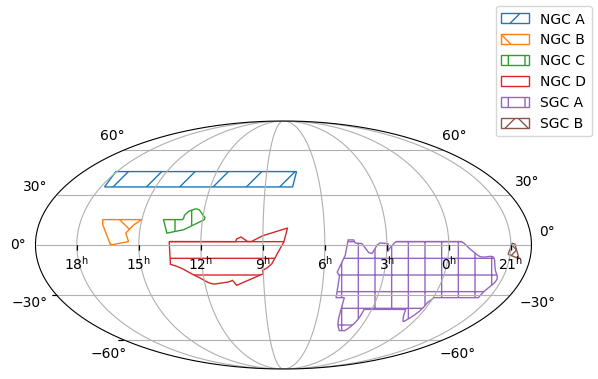

In [2]:
regions = Regions.read("survey-footprints/lmlz-wide.ds9")

fig = plt.figure()
ax = fig.add_subplot(projection="astro mollweide", center="8h 0d")
ax.grid()
for region, color_style, hatch_style in zip(
    regions.regions, plt.rcParams["axes.prop_cycle"], cycler(hatch=r"/\|-+xo.")
):
    ax.add_patch(
        region.to_pixel(ax.wcs).as_artist(
            **color_style, **hatch_style, label=region.meta["text"]
        )
    )
fig.legend()

/Users/lpsinger/src/uvex-scheduler/.venv/lib/python3.12/site-packages/regions/shapes/polygon.py:180: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Polygon(xy=xy, **mpl_kwargs)


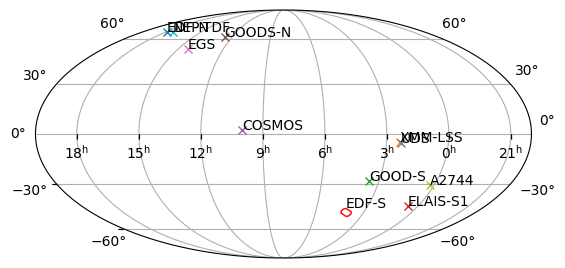

In [3]:
regions = Regions.read("survey-footprints/lmlz-deep.ds9")
points = [region for region in regions.regions if isinstance(region, PointSkyRegion)]
regions = [
    region for region in regions.regions if not isinstance(region, PointSkyRegion)
]

fig = plt.figure()
ax = fig.add_subplot(projection="astro mollweide", center="8h 0d")
ax.grid()
for region in regions:
    ax.add_patch(region.to_pixel(ax.wcs).as_artist(color="red"))
    ax.annotate(region.meta["text"], ax.wcs.world_to_pixel(region.vertices[0]))

for region in points:
    ax.plot_coord(region.center, "x")
    ax.annotate(region.meta["text"], ax.wcs.world_to_pixel(region.center))